In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
plant_height_raw = pd.read_csv('plant_height.csv')
height_raw = pd.read_csv('height.csv')

plant_height_raw.head()
height_raw.head()

,name,date,mean,sitename,greenhouse,city,cultivar_id,site_id
0,height,2016-08-08T19:00:00Z,32.166,MAC Field Scanner Field Plot 530 Season 2,False,Maricopa,NaN,6.000003e+09
1,height,2016-08-08T19:00:00Z,30.844,MAC Field Scanner Field Plot 531 Season 2,False,Maricopa,NaN,6.000003e+09
2,height,2016-08-08T19:00:00Z,30.844,MAC Field Scanner Field Plot 532 Season 2,False,Maricopa,NaN,6.000003e+09
3,height,2016-08-08T19:00:00Z,30.844,MAC Field Scanner Field Plot 533 Season 2,False,Maricopa,NaN,6.000003e+09
4,height,2016-08-08T19:00:00Z,31.505,MAC Field Scanner Field Plot 534 Season 2,False,Maricopa,NaN,6.000003e+09


In [43]:
# plant_height is only in greenhouse (St Louis)   915 data pts
# height is in Maricopa                           22450 data pts

height_raw[ height_raw.city == "Maricopa" ].shape
plant_height_raw[ plant_height_raw.city == "St. Louis" ].shape


plant_height_raw.groupby('site_id')

In [47]:
dates = plant_height_raw['date'].str[:10]
dates = pd.to_datetime( dates, format='%Y-%m-%d' )

plant_height = plant_height_raw.copy()
plant_height['date'] = dates
plant_height.head()


,name,date,mean,sitename,greenhouse,city,cultivar_id,site_id
0,plant_height,2014-06-16,928.0,Danforth Plant Science Center Bellweather Phen...,True,St. Louis,6000000238,6000000866
1,plant_height,2014-06-16,569.0,Danforth Plant Science Center Bellweather Phen...,True,St. Louis,6000000231,6000000866
2,plant_height,2014-06-16,873.0,Danforth Plant Science Center Bellweather Phen...,True,St. Louis,6000000231,6000000866
3,plant_height,2014-06-16,775.0,Danforth Plant Science Center Bellweather Phen...,True,St. Louis,6000000231,6000000866
4,plant_height,2014-06-10,553.0,Danforth Plant Science Center Bellweather Phen...,True,St. Louis,6000000238,6000000866


In [24]:
grouped = plant_height.groupby('cultivar_id')
grouped

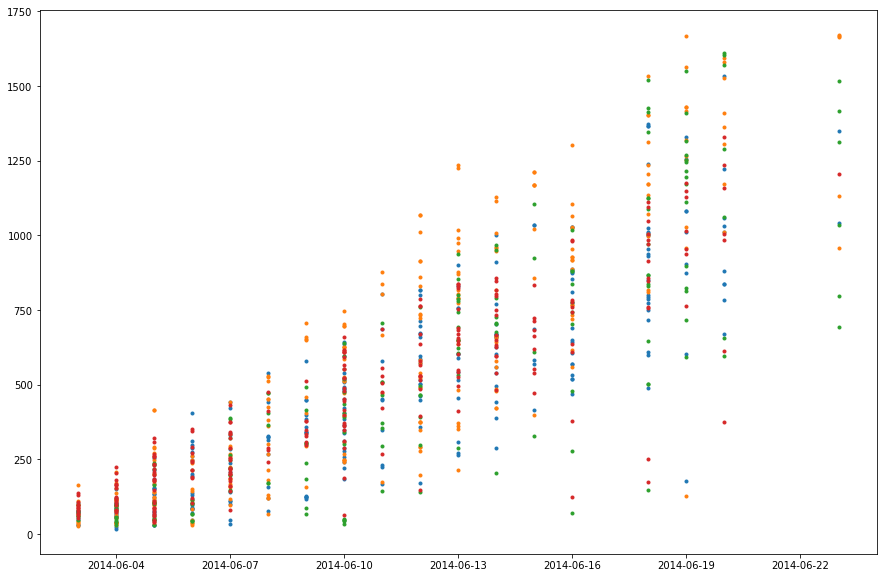

In [56]:
fig,ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(15)
for key, group in grouped:
    ax.plot( group['date'], group['mean'], '.')
plt.show()

fig.savefig('indoor_heights_by_cultivar.png')

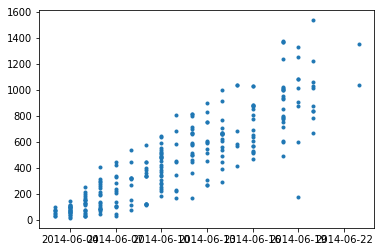

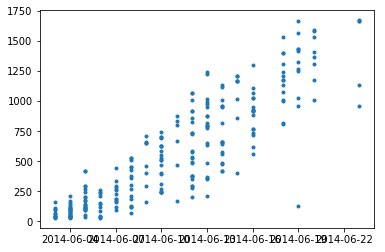

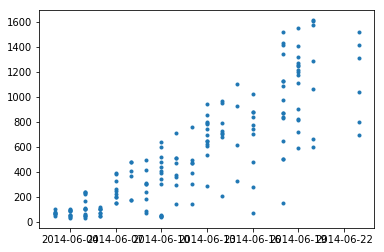

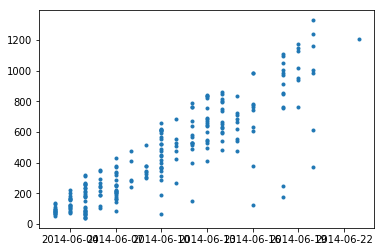

In [57]:

for key, group in grouped:
    fig,ax = plt.subplots()
    ax.plot( group['date'], group['mean'], '.')
    fig.savefig(str(key)+'.png')

